# Feedforward and Backpropagation



Sources:
- [YouTube: 3Blue1Brown / Backpropagation calculus | DL4](https://www.youtube.com/watch?v=tIeHLnjs5U8)
- [YouTube: Building a neural network FROM SCRATCH (no Tensorflow/Pytorch, just numpy & math)](https://youtu.be/w8yWXqWQYmU?si=xYfcumYuuNfBELvD)

Data source:
- [Kaggle's Digit Recognizer problem](https://www.kaggle.com/competitions/digit-recognizer)

This notebook aims to understand/explain math behind forward-feeding and backpropagation algorithms in **Feedforward Neural Network (FNN)**:
- A **Feedforward Neural Network (FNN)** is a type of artificial neural network where connections between the nodes do not form cycles. 
- This characteristic differentiates it from **Recurrent Neural Networks (RNNs)**. 

Statement:

- Goal: train a model to recognise hand-written digits from 0 to 9.

- Approach: use **supervised learning** (i.e. train on labeled examples) using **deep neural network** (i.e. artification neural network with many hidden layers) to get **multi-class classification** model working with **single-labeled** examples.

- *Input*: Dataset of training images with 20x20 pixels in grayscale of 255

- *Output*: Probability for 10 digits in vector per testing image, where sum of digits probabilities sum ups to 1.0

# Architecture of Deep Neural Network based on Multi-layer ReLU
Note: it usually called incorectly as Multi-layer Perceptron


Let's consider we're having following architecture of our deep neural network:
1. **Input layer** – vector of 28 x 28 with no activation function, no model parameters (i.e. weight and bias)
2. 1 x **Hidden layer** – vector of 16 with ReLU activation function
3. **Output layer** – vector of 10 with Softmax activation function

Note: **Softmax activation** function is commonly used for multi-class classification of one-to-one, i.e. for determining probability of each possible class, so probabilities add up to exactly 1.0. 
Example: apple vs orange

# Feedfowarding step

The input data passes through the network, and the output is calculated.

## Math description


*Note*: Matrixes multiplication

$$
Matrix A_{(m, n)} = (3, 2)
\begin{bmatrix}
a & b \\
c & d \\
e & f \\
\end{bmatrix}

*

Matrix B_{(n, k)} = (2, 3)
\begin{bmatrix}
i & j & k \\
l & m & n \\
\end{bmatrix}

=

Matrix C_{(m, k)} = (3, 3)
\begin{bmatrix}
a*i + b*l & a*j + b*m & a*k + b*n \\
c*i + d*l & c*j + d*m & c*k + d*n \\
e*i + f*l & e*j + f*m & e*k + f*n
\end{bmatrix}
$$


*Note 2*: $\sigma$ is **activation function**

For hidden layers we use **ReLU**:

$$
ReLU(x) = 

max(0,x) =

\begin{cases}
x & \quad \text{if } x > 0\\ 
0 & \quad \text{if } x \leq 0
\end{cases}
$$

For output layer we use **Softmax**:

$$
Input layer
\begin{bmatrix}
1.3 \\
5.1 \\
2.2 \\
0.7 \\
1.1
\end{bmatrix} = 

Softmax() = 
\dfrac{ e^{z_{i}} }
{ \sum_{j=1}^K e^{z_{j}} }

= 
\text {Probabilities (sum up to 1.0)}
\begin{bmatrix}
0.02 \\
0.90 \\
0.05 \\
0.01 \\
0.02
\end{bmatrix}
$$

where:
- $\sigma$	    –	softmax
- $\vec{z}$	    –	input vector
- $e^{z_{i}}$	–	standard exponential function for input vector
- $K$	        –	number of classes in the multi-class classifier
- $e^{z_{j}}$	–	standard exponential function for output vector


## calculate single node in a layer:

- $w^L$ – weight to current layer node
- $a^L$ - value of layer node
- $b^L$ – bias of current layer node
- y – desired output for value of layer node

Cost function = $C_0 = (a^L - y)^2$

Note: **cost function** is the average (or sum) of the individual **losses** from each example.

- $z^L = w^L * a^{L-1} + b^L$
- $a^L = \sigma(z^L)$


## Image from "3Blue1Brown / Backpropagation calculus | DL4" video about cost function


![3blue1brown_feedforwarding.PNG](images/3blue1brown_feedforwarding.PNG)


## calculate all nodes in a layer using matrix multiplication:

* m – number of examples
* $A^{[0]} = x$                               – don't calcualte input layer, it's just input matrix with shape (784, m) of pixel [0..254] grayscale values normalized to $[0..1]$ 
* $Z^{[1]} = W^{[1]} * A^{[0]} + b^{[1]}$     – linear calculation of hidden layer with shape (16, m)
  * $W^{[1]}$ – weights to layer in matrix with shape (16, 784)
  * $A^{[0]}$ – values of input layer in vector with shape (784, m)
  * $b^{[1]}$ – biases of layer in vector with shape (16, 1)
* $A^{[1]} = \sigma(Z^{[1]}) = ReLU(Z^{[1]})$ – values for hidden layer got from applying ReLU activation function on linear calculation of this hidden layer, with shape (16, m)

* $Z^{[2]} = W^{[2]} * A^{[1]} + b^{[2]}$     – linear calculation of output layer in vector with shape (10, m)
  * $W^{[2]}$ – weights to output layer in matrix with shape (10, 16)
  * $A^{[1]}$ – values of hidden layer in vector with shape (16, m)
  * $b^{[2]}$ – biases of output layer in vector with shape (10, 1)
* $A^{[2]} = Softmax(Z^{[2]})$                   – vector of values for output layer in vector with shape (10, m)


# Backpropagation step

The error is propagated back through the network to update the weights. 

The gradient of the loss function with respect to each weight is calculated, and the weights are adjusted using gradient descent.


## Math Description


*Note*: $\sigma$ – the Standard Deviation is a measure of how spread out numbers are. Deviation just means how far from the normal. 

*Note 2*: $f(x_1)^ \prime = \dfrac{dy}{dx}$ – derivative of a function at a given point gives us the rate of change or slope of the tangent line to the function at that point.

Other definitions:
- slope of tangent line at $x_1$
- rate of change of y with respect to $x_1$

*Note 3*: $A^{T}$ – Transposed matrix is a matrix that is obtained by swapping the rows and columns of the given matrix or vice versa, i.e., for the given matrix the elements in rows are interchanged with the elements in columns. 

$$
Original Matrix
\begin{bmatrix}
1.3 & 5.1 \\
2.2 & 0.7 \\
1.1 & 3.5 \\
\end{bmatrix} = 

\begin{bmatrix}
5.1 & 0.7 & 3.5\\
1.3 & 2.2 & 1.1 \\
\end{bmatrix}
Transposed Matrix
$$

*Note 4*: Derivative of ReLU activation function

Because of ReLU function definition is straightforward, so its derivative is also straightforward to derive:

- For x > 0: The function is linear ( $\text{ReLU}(x) = x$ ), so the derivative is 1.
- For  x < 0: The function is constant ( $\text{ReLU}(x) = 0$ ), so the derivative is 0.
- At  x = 0: Mathematically, the derivative is undefined because the function has a “corner” (a point of non-differentiability). 
  - However, in practice, this is often resolved by arbitrarily choosing the derivative to be 0 or 1. Most implementations choose 0.

$$
ReLU^ \prime(x) = 
\begin{cases}
1 & \quad \text{if } x > 0\\ 
0 & \quad \text{if } x \leq 0
\end{cases}
$$


## Math formulas

Deviation for output layer:

- $dZ^{[2]} = A^{[2]} - Y$ – deviation of ouput layer values errors comparing with actual label output values in vector with shape (10, m)
  - $A^{[2]}$ – vector of values for output layer with shape (10, m)
  - Y – actual label as one-hot encoded vector with shape (10, m)
- $dW^{[2]} = \dfrac{1}{m} * dZ^{[2]} * A^{[1]T}$ – deviation of weights of output layer in matrix with shape (10, 16)
  - $dZ^{[2]}$ – deviation of ouput layer values in vector with shape (10, m)
  - $A^{[1]T}$ – transposed values for hidden layer with shape (m, 16)
- $db^{[2]} = \dfrac{1}{m} * \sum dZ^{[2]}$ – deviation of biases of output layer in vector with shape (10, 1)

Deviation for hidden layer:
- $dZ^{[1]} = W^{[2]T} * dZ^{[2]} * \sigma^ \prime(Z^{[1]})$ – deviation of hidden layer values in vector with shape (16, m)
  - $W^{[2]T}$ – weights of output layer in transposed matrix with shape (16, 10)
  - $dZ^{[2]}$ – deviation of ouput layer values in vector with shape (10, m)
  - $\sigma^ \prime(Z^{[1]})$ – derivative of activation function in vector with shape (16, m)
- $dW^{[1]} = \dfrac{1}{m} * dZ^{[1]} * A^{[0]T}$ – deviation of weights of hidden layer in matrix with shape (16, 10)
  - $dZ^{[1]}$ – deviation of hidden layer values in vector with shape (16, m)
  - $X^T$ – transposed vector of values for input layer with shape (m, 10)
- $db^{[1]} = \dfrac{1}{m} * \sum dZ^{[1]}$ – deviation of biases of hidden layer in vector with shape (16, 1)

Change model parameters using calculated deviations:
- $W^{[2]} = W^{[2]} - \alpha * dW^{[2]}$
- $b^{[2]} = b^{[2]} - \alpha * db^{[2]}$
- $W^{[1]} = W^{[1]} - \alpha * dW^{[1]}$
- $b^{[1]} = b^{[1]} - \alpha * db^{[1]}$

*Note*: $\alpha$ – learning rate is hyperparameter set before training model

## Images from "3Blue1Brown / Backpropagation calculus | DL4" video about derivatives

![3blue1brown_backpropagation_derivatives.PNG](images/3blue1brown_backpropagation_derivatives.PNG)

![3blue1brown_backpropagation_derivative_of_full_cost_function.PNG](images/3blue1brown_backpropagation_derivative_of_full_cost_function.PNG)

# Implement using Numpy

## Preparation

Import libraries, import data and split testing data to testing dataset and validation dataset

In [9]:
# import

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import os
import kaggle

Dataset: https://www.kaggle.com/competitions/digit-recognizer/data

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 

The training data set, (train.csv), has 785 columns. 
The first column, called "label", is the digit that was drawn by the user.
The rest of the columns contain the pixel-values of the associated image.

In [10]:
# download or update existing dataset

%env WORKDIR=/Users/sstamkulov/Documents/ml/tmp
%env DATADIR=/Users/sstamkulov/Documents/ml/tmp/digit-recognizer

!kaggle competitions download digit-recognizer -p=$WORKDIR

!unzip $WORKDIR/digit-recognizer.zip -o -d $DATADIR

env: WORKDIR=/Users/sstamkulov/Documents/ml/tmp
env: DATADIR=/Users/sstamkulov/Documents/ml/tmp/digit-recognizer
digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /Users/sstamkulov/Documents/ml/tmp/digit-recognizer.zip
caution: filename not matched:  -o


In [11]:
# Load training data

data = pd.read_csv(f"{os.environ['DATADIR']}/train.csv")

In [12]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Convert pandas.DataFrame into Numpy.array

data = np.array(data)

In [24]:
# Split training data to training and validation datasets

# Get dimension of train dataset
# m – number of rows (i.e. examples)
# n – number of columns (i.e. pixels)
m, n = data.shape
print(m, n)

np.random.shuffle(data)

def split_label_and_normalize(dataset):
    # Split labels from validation dataset examples
    Y = dataset[0]
    X = dataset[1:n]
    # Normalize image data from [0..254] grayscale into [0..1]
    X = X / 255.0
    return Y, X


# Get data for validation dataset and transpose it, so each columns becomes example and first row becomes labes
data_validation = data[0:1000].T
# Split labels from validation dataset examples
Y_validation, X_validation = split_label_and_normalize(data_validation)

# Get data for train dataset and transpose it, so each columns becomes example and first row becomes labes
data_train = data[1000:m].T
# Split labels from train dataset examples
Y_train, X_train = split_label_and_normalize(data_train)

42000 785


In Numpy array [:, 0] does following:
* `:` selects all rows
* `0` selects the first column

In [26]:
# Return a shape of 1-dimensional array containing the values of first column for each row

X_train[:, 0].shape

(784,)

## Define main functions

Including: model parameters initialization, activation functions and their derivative functions, feedforward and backpropagation calculation functions

In [27]:
def init_params():
    W1 = np.random.rand(16, 784) - 0.5
    b1 = np.random.rand(16, 1) - 0.5
    W2 = np.random.rand(10, 16) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def derivative_ReLU(Z):
    return Z > 0

def softmax_with_numerical_stability_trick(Z):
    # Subtract max value for numerical stability
    Z -= np.max(Z, axis=0)
    return np.exp(Z) / np.sum(np.exp(Z), axis=0)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = softmax_with_numerical_stability_trick(Z2)

    return Z1, A1, Z2, A2

def one_hot_encode(Y):
    # First determine the number of unique categories in your data. 
    # Then, create a zero-filled matrix with a row for each data sample and a column for each category.
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) 
    # For each sample, set the column corresponding to its category to 1.
    one_hot_Y[np.arange(Y.size), Y] = 1
    """
    index_arr = np.arange(Y.size) – creates an array of row indices from 0 to Y.size - 1
    one_hot_Y[index_arr, Y] – for each row i, it picks the element at column Y[i]
    For example: 
       Row 0: Set one_hot_Y[0, Y[0]] = 1
    """
    # Finally, transpose one-hot encoded matrix, so a row for category and a column for each data sample
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, one_hot_Y):
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2



## Define learning functions

Including accuracy calculation function and gradient descending 


In [28]:
def get_predictions(A2):
    # get indices of the maximum values along the first axis in output layer values
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # predictions == Y – performs an element-wise comparison between the predictions array and the true labels array Y. 
    # This returns a Boolean array which being sum up to represent the total number of correct predictions.
    # Finally, divided to number of total examples.
    return np.sum(predictions == Y) / Y.size

def gradient_descend(X, Y, epoch, learning_rate):
    W1, b1, W2, b2 = init_params()

    one_hot_Y = one_hot_encode(Y)

    for i in range(epoch):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, one_hot_Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        # every 10 iterations
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    
    return W1, b1, W2, b2



## Train model on training dataset



In [29]:
learning_rate = 0.3
epoch = 500

W1, b1, W2, b2 = gradient_descend(X_train, Y_train, epoch, learning_rate)


Iteration:  0
Accuracy:  0.09295121951219512
Iteration:  10
Accuracy:  0.3967317073170732
Iteration:  20
Accuracy:  0.5450243902439025
Iteration:  30
Accuracy:  0.6474634146341464
Iteration:  40
Accuracy:  0.7116585365853658
Iteration:  50
Accuracy:  0.7522926829268293
Iteration:  60
Accuracy:  0.779390243902439
Iteration:  70
Accuracy:  0.7983658536585366
Iteration:  80
Accuracy:  0.810829268292683
Iteration:  90
Accuracy:  0.7965365853658537
Iteration:  100
Accuracy:  0.8288292682926829
Iteration:  110
Accuracy:  0.8376341463414634
Iteration:  120
Accuracy:  0.8422682926829268
Iteration:  130
Accuracy:  0.8424634146341463
Iteration:  140
Accuracy:  0.8482926829268292
Iteration:  150
Accuracy:  0.8564390243902439
Iteration:  160
Accuracy:  0.8612195121951219
Iteration:  170
Accuracy:  0.8650975609756097
Iteration:  180
Accuracy:  0.867609756097561
Iteration:  190
Accuracy:  0.8696829268292683
Iteration:  200
Accuracy:  0.8711951219512195
Iteration:  210
Accuracy:  0.8736829268292683
I

## Define evaluation functions

In [30]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def print_image(image_data):
    image_data = image_data.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(image_data, interpolation='nearest')
    plt.show()

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    print_image(current_image)
    

## Evaluate model on few examples from training dataset

Getting examples from training dataset by index in order, we already randomized dataset before.

Prediction:  [4]
Label:  4


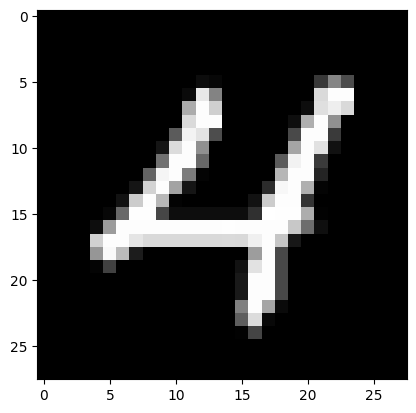

Prediction:  [0]
Label:  0


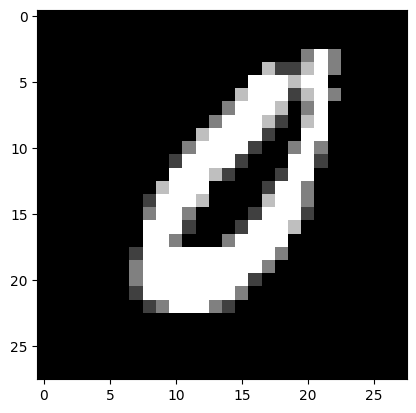

Prediction:  [0]
Label:  0


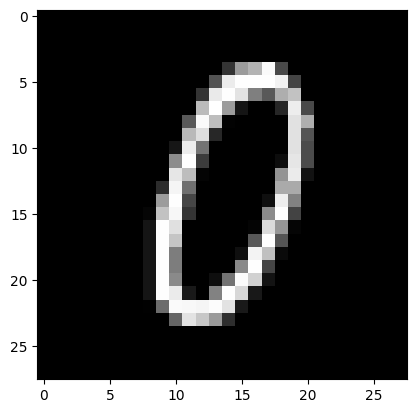

Prediction:  [2]
Label:  2


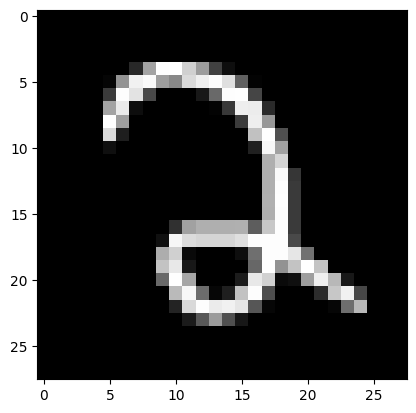

In [31]:
## evaluate the model using earlier trained parameters (weights and biases)

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

## Evaluate model on evaluation dataset

It gives 90.1% percent of prediction accuracy

In [32]:
validation_predictions = make_predictions(X_validation, W1, b1, W2, b2)
get_accuracy(validation_predictions, Y_validation)

np.float64(0.893)

## Generate Kaggle prediction

It received Score: `0.09960` when submitting predictions for test dataset with the model with accuracy of `0.89` on training dataset 

In [35]:
# Load testing dataset
df_test = pd.read_csv(f"{os.environ['DATADIR']}/test.csv")

# convert pandas.DataFrame into Numpy.array
data_test = np.array(df_test)

# Get data for test dataset and transpose it, so each columns becomes example and first row becomes labes
data_test = data_test.T
# Split labels from train dataset examples
X_test = data_test / 255.0


In [50]:
# run model to get predictions
validation_predictions = make_predictions(X_test, W1, b1, W2, b2)
print(validation_predictions.shape)
print(validation_predictions[:10])

# prepare submission file
my_submission = pd.DataFrame({'ImageId': np.arange(1, len(predictions) + 1), 'Label': predictions})
# you could use any filename. We choose submission here
my_submission.to_csv(f"{os.environ['DATADIR']}/submission.csv", index=False)
print(my_submission[:10])


(28000,)
[2 0 9 7 2 7 0 3 0 3]
   ImageId  Label
0        1      2
1        2      1
2        3      4
3        4      8
4        5      6
5        6      4
6        7      6
7        8      8
8        9      5
9       10      2
